In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [4]:
df=pd.read_csv("income.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
 3   cluster    22 non-null     int32 
dtypes: int32(1), int64(2), object(1)
memory usage: 744.0+ bytes


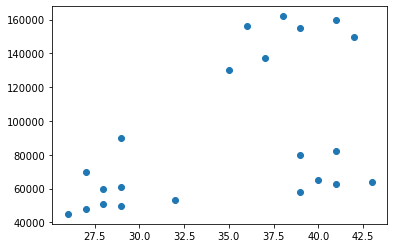

In [14]:
plt.scatter("Age","Income($)",data=df)

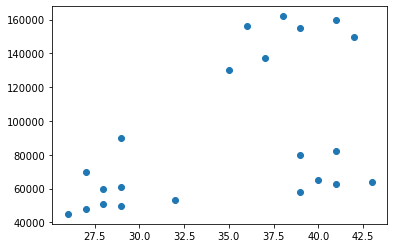

In [15]:
plt.scatter(df["Age"],df["Income($)"])

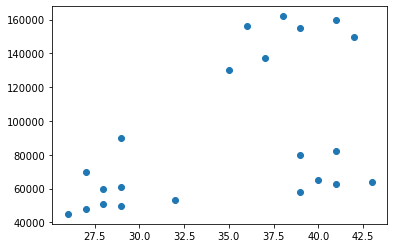

In [22]:
plt.scatter(df.Age,df["Income($)"])

In [33]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [34]:
df["cluster"]=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [35]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [36]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

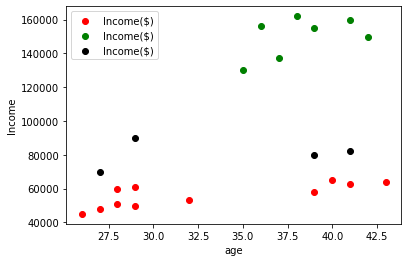

In [47]:
plt.scatter("Age","Income($)",data=df1,color="red")
plt.scatter("Age","Income($)",data=df2,color="green")
plt.scatter("Age","Income($)",data=df3,color="black")
plt.xlabel("age")
plt.ylabel("Income")
plt.legend()

In [49]:
scaler=MinMaxScaler()
scaler.fit(df[["Income($)"]])
df["Income($)"]=scaler.transform(df[["Income($)"]])


In [50]:
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [51]:
scaler=MinMaxScaler()
scaler.fit(df[["Age"]])
df["Age"]=scaler.transform(df[["Age"]])

In [52]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


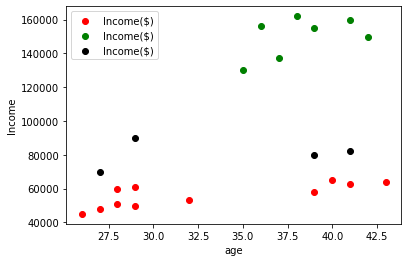

In [53]:
plt

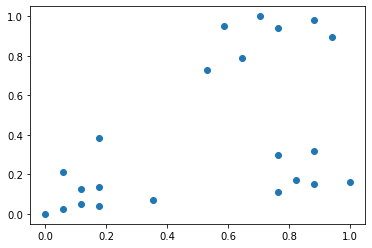

In [54]:
plt.scatter(df.Age,df["Income($)"])

In [55]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [56]:
df["cluster"]=y_predicted

In [57]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [58]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

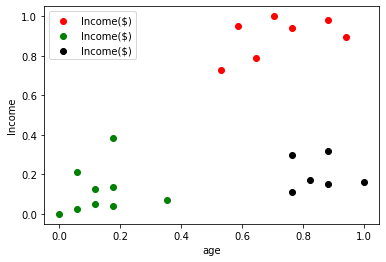

In [59]:
plt.scatter("Age","Income($)",data=df1,color="red")
plt.scatter("Age","Income($)",data=df2,color="green")
plt.scatter("Age","Income($)",data=df3,color="black")

plt.xlabel("age")
plt.ylabel("Income")
plt.legend()

In [62]:
#Elbpw plot
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

In [63]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.22443334487241415,
 0.17536968346013684,
 0.13265419827245162,
 0.10188787724979426]

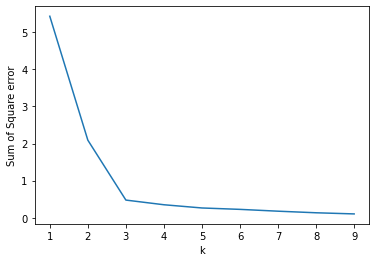

In [64]:
plt.xlabel("k")
plt.ylabel("Sum of Square error")
plt.plot(k_range,sse)